In [23]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, precision_score

In [2]:
seed = 12
tf.random.set_seed(seed)

# Load Reuters Dataset

In [3]:
keras = tf.keras
reuters = keras.datasets.reuters
(x_train,y_train), (x_test,y_test) = keras.datasets.cifar10.load_data()

# Normalise Dataset

In [4]:
x_train_norm,x_test_norm = x_train / 255.0, x_test / 255.0
x_train_norm.shape

(50000, 32, 32, 3)

# Build Basic Neural Network

In [8]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(32,32,3)),
    tf.keras.layers.Dense(128,activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10)
])

/opt/conda/lib/python3.11/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [9]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

model.compile(optimizer='adam',
              loss=loss_fn,
              metrics=['accuracy'])

In [10]:
model.fit(x_train_norm,y_train,epochs=5)

Epoch 1/5


2025-03-03 15:59:13.901308: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 614400000 exceeds 10% of free system memory.


1563/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.1992 - loss: 2.1249
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.2595 - loss: 1.9625
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.2699 - loss: 1.9387
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 21s 8ms/step - accuracy: 0.2762 - loss: 1.9223
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.2790 - loss: 1.9199


# Evaluate Model

In [12]:
model.evaluate(x_test_norm,y_test,verbose=2)

2025-03-03 16:01:05.410298: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 122880000 exceeds 10% of free system memory.


313/313 - 1s - 3ms/step - accuracy: 0.3340 - loss: 1.8408


[1.840815782546997, 0.33399999141693115]

In [16]:
pred = np.argmax(model.predict(x_test),1)
pred

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


array([5, 9, 8, ..., 5, 5, 7])

In [17]:
y_test

array([[3],
       [8],
       [8],
       ...,
       [5],
       [1],
       [7]], dtype=uint8)

In [29]:
c_matrix = confusion_matrix(y_test, pred)
c_matrix

array([[528,  47,   8,   6,   8,  28,  19,  32, 209, 115],
       [ 80, 432,   4,   9,   3,  51,  20,  19, 126, 256],
       [229,  56,  51,  20, 134, 152, 115, 113,  75,  55],
       [102,  55,  17,  45,  18, 371,  63,  88,  89, 152],
       [138,  36,  55,  10, 198, 162, 150, 138,  47,  66],
       [ 83,  42,  29,  29,  40, 424,  67,  98, 104,  84],
       [ 43,  43,  33,  26,  83, 272, 258,  90,  25, 127],
       [134,  43,  45,  25,  50,  96,  55, 313,  46, 193],
       [375, 111,   1,   6,   0,  42,   6,   3, 313, 143],
       [ 92, 153,   3,  12,   2,  19,  16,  31,  86, 586]])

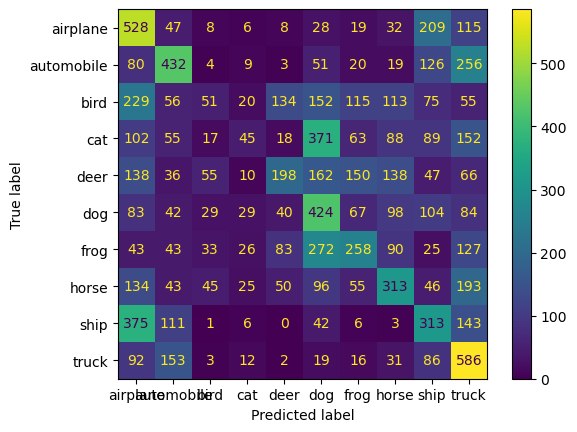

In [33]:
labels =['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']
display = ConfusionMatrixDisplay(confusion_matrix=c_matrix,display_labels=labels)
display.plot()
plt.show()

The model doesn't perform that well. Though it seems to differentiate between animals and vehicles quite well. It is also obvious that it doesnt do well between these vehicles, as airplane and automobile are mixed up in the matrix, through a truck and airplane are quite separated in the model

In [ ]:
# Building a basic CNN